In [1]:
from comp_metrics import *
from plot import *
from preprocessing import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

df_huawei = read_huawei_heart_rate('/home/ubuntu/working-dir/huawei_data-proj/数据比较/data/raw/huawei_heart_rate.csv')
df_e66 = read_e66_heart_rate('/home/ubuntu/working-dir/huawei_data-proj/数据比较/data/raw/e66.json')
df_huawei_resample = resample_5t(df_huawei)
df_e66_resample = resample_5t(df_e66)
merge_df = generate_merge_df(df_huawei_resample, df_e66_resample)

df_huawei_resample

/tmp/ipykernel_160108/3594974813.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')
/home/ubuntu/working-dir/huawei_data-proj/数据比较/tscompare/preprocessing.py:140: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df = df.resample('5t').pad()


,value
time,
2022-05-18 00:00:00,NaN
2022-05-18 00:05:00,78.0
2022-05-18 00:10:00,100.0
2022-05-18 00:15:00,78.0
2022-05-18 00:20:00,93.0
...,...
2022-05-18 22:35:00,88.0
2022-05-18 22:40:00,92.0
2022-05-18 22:45:00,87.0


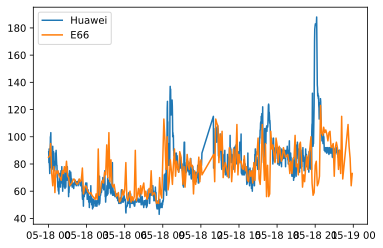

In [2]:
plt.plot(df_huawei.index, df_huawei[['value']], label = 'Huawei')
plt.plot(df_e66.index, df_e66[['value']], label = 'E66')
plt.legend()

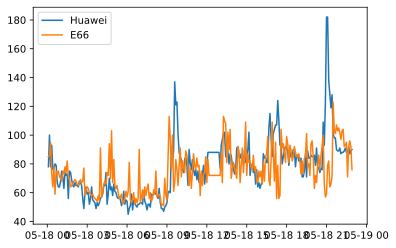

In [3]:
plt.plot(merge_df.index, merge_df[['value1']], label = 'Huawei')
plt.plot(merge_df.index, merge_df[['value2']], label = 'E66')
plt.legend()

In [4]:
merge_df = merge_df.dropna()

In [5]:
huawei_array = merge_df['value1'].values
e66_array = merge_df['value2'].values

eclidean = calc_euclidean(huawei_array, e66_array)
mae = calc_mae(huawei_array, e66_array)
mape = calc_mape(huawei_array, e66_array)
cosine = calc_cosine(huawei_array, e66_array)
correlation = calc_correlation(huawei_array, e66_array)

print('Euclidean distance:', eclidean)
print('MAE:', mae)
print('MAPE:', mape)
print('Cosine similarity:', cosine)
print('Pearson correlation:', correlation)

Euclidean distance: 326.23151288617106
MAE: 12.403636363636364
MAPE: 0.1495907295312642
Cosine similarity: 0.9688880456559175
Pearson correlation: 0.39650736075298415
